# Lecture 5

In [3]:
using Random, Distributions, Plots
#Lecture 5.1
#We'll integrate a function using Monte Carlo integration.
g(x) = sin(x^2) #Function to integrate
#Integral bounds
a=0
b=2
dist = Uniform(a,b)
sample_size = 100000
X=rand(dist,sample_size) #Generates a list of uniform random numbers
I_MC=(b-a)/sample_size*sum(g.(X)) #Monte Carlo Estimator
println(I_MC) #For comparison, actual value for the integral of sin(x^2) from 0 to 1 is around .804776.

0.8109243177817607


[16807, 100000, 1048576, 11881376, 102400000]
[0.023148148148148584, 0.010288065843621075, 0.0037037037037035425, 0.0013333333333329644, 0.0005478851632698678]


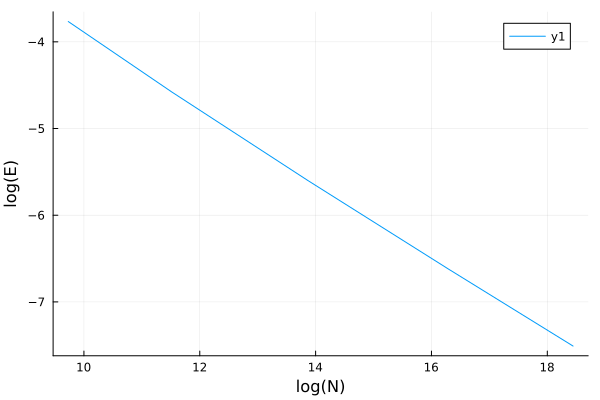

LoadError: UndefVarError: `linregress` not defined

In [2]:
#Lecture 5.2
#We compute a high dimensional integral using a trapezoid rule
#This section of the code is not all that important for our purposes, we compute the integral of x1^2+x2^2+x3^2+x4^2+x5^2 over
#a cube from 0 to 1 in all variables using a high dimensional trapezoid rule.
using Trapz, linearRegression
N=[7,10,16,26,40]
I_Trap = zeros(length(N))
for i in 1:length(N)
    d=range(0,1,length=N[i])
    M=[v^2+w^2+x^2+y^2+z^2 for v=d,w=d,x=d,y=d,z=d]
    I_Trap[i]=trapz((d,d,d,d,d),M)
end
I=5/3 #The actual value of the integral.
E=abs.(I*ones(length(N))-I_Trap) #Error
println(N.^5) #Actual number of gridpoints used
println(E)
P=plot(log.(N.^5),log.(E),xlabel="log(N)",ylabel="log(E)")
display(P)
L=linregress(log.(N.^5),log.(E))
println(LinearRegression.slope(L))

[0.02068413999211982, 0.026669998476309464, 0.007894437153473488, 0.0014763674167272978, 0.00015977028819724737]


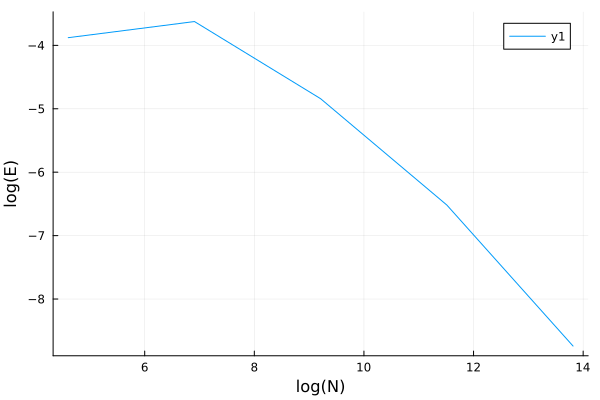

LoadError: UndefVarError: `linregress` not defined

In [4]:
#Lecture 5.3
#We compute a high dimensional integral using Monte Carlo integration
N=[100,1000,10000,100000,1000000]
dist = Uniform(0,1)
I_MC = zeros(length(N))
for i in 1:length(N)
    s = 0
    for j in 1:N[i]
        X=rand(dist,5)
        s+=sum(X.^2)
    end
    I_MC[i]=1/N[i]*s
end
I=5/3 #The actual value of the integral.
E=abs.(I*ones(length(N))-I_MC)
println(E)
P=plot(log.(N),log.(E),xlabel="log(N)",ylabel="log(E)")
display(P)
L=linregress(log.(N),log.(E))
println(LinearRegression.slope(L))

In [ ]:
#Lecture 6.1
#We calculate an expected value using both crude Monte Carlo and importance sampling.
#Crude Monte Carlo
g(x) = (1-(x-5)^2)*(4<=x<=6) #The second parentheses return 0 unless x is in the desired range.
a=4
b=6
dist = Normal(0,1)
sample_size = 10000 #100000
X=rand(dist,sample_size) 
I_MC=1/sample_size*sum(g.(X)) #Monte Carlo Estimator
V_MC=1/sample_size*sum((g.(X)-ones(sample_size)*I_MC).^2)/(sample_size-1) #Variance
println("Crude_Monte Carlo: ",I_MC)
println("Variance: ",V_MC)

#Importance Sampling
g_IS(x) = (1-(x-5)^2)*exp(-x^2/2)*exp((x-5)^2/2)*(4<=x<=6)#Modified function
IS_dist = Normal(5,1) #Importance sampling distribution
Y=rand(IS_dist,sample_size) 
I_IS=1/sample_size*sum(g_IS.(Y)) #Importance Sampling Estimator
V_IS=1/sample_size*sum((g_IS.(Y)-ones(sample_size)*I_IS).^2)/(sample_size-1)
println("Importance Sampling: ",I_IS)
println("Variance: ",V_IS)

println("True Expected Value: .0000112")